#📌 Extracão

In [42]:

import pandas as pd
import requests
import json


url_dados = 'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR/refs/heads/main/TelecomX_Data.json'

try:
    response = requests.get(url_dados)
    response.raise_for_status()
    data = json.loads(response.text)

    dados_clientes = pd.json_normalize(data)

    print("Dados extraídos e organizados com sucesso da forma simples!")
    display(dados_clientes.head())

except Exception as e:
    print(f"Ocorreu um erro: {e}")



Dados extraídos e organizados com sucesso da forma simples!


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4


#🔧 Transformação

In [43]:
import numpy as np

print("--- Iniciando a Transformação e Limpeza dos Dados ---")

# Corrigindo os dados

dados_clientes['account.Charges.Total'] = pd.to_numeric(dados_clientes['account.Charges.Total'], errors='coerce')

dados_clientes['Churn'] = dados_clientes['Churn'].replace('', np.nan)

dados_clientes.dropna(inplace=True)

print("\nDados despadronizados corrigidos e removidos.")

# Verificando limpeza dos dados
print("\n------- Verificação Pós-Limpeza -------")

# Confirmando se não há mais valores ausentes
print(f"\nValores ausentes restantes: {dados_clientes.isnull().sum().sum()}")

# Confirmando se não há clientes duplicados
print(f"Clientes duplicados restantes: {dados_clientes['customerID'].duplicated().sum()}")

# Mostrando os valores únicos na coluna Churn para provar que o '' sumiu
print(f"Valores únicos em 'Churn' agora: {pd.unique(dados_clientes['Churn'])}")

# Mostrando o status final do DataFrame
print("\n------- Estrutura Final dos Dados para Análise-------")
dados_clientes.info()

--- Iniciando a Transformação e Limpeza dos Dados ---

Dados despadronizados corrigidos e removidos.

------- Verificação Pós-Limpeza -------

Valores ausentes restantes: 0
Clientes duplicados restantes: 0
Valores únicos em 'Churn' agora: ['No' 'Yes']

------- Estrutura Final dos Dados para Análise-------
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines       

In [44]:
#Adicionando coluna 'Contas Diárias'
print("------- Criando a coluna 'Contas_Diarias' -------")

dados_clientes['Contas_Diarias'] = dados_clientes['account.Charges.Monthly'] / 30

print("\nColuna 'Contas_Diarias' criada com sucesso. Veja a amostra:")
print(dados_clientes[['customerID', 'account.Charges.Monthly', 'Contas_Diarias']].head())

print("\n------- Estrutura Final dos Dados-------")
dados_clientes.info()

------- Criando a coluna 'Contas_Diarias' -------

Coluna 'Contas_Diarias' criada com sucesso. Veja a amostra:
   customerID  account.Charges.Monthly  Contas_Diarias
0  0002-ORFBO                    65.60            2.19
1  0003-MKNFE                    59.90            2.00
2  0004-TLHLJ                    73.90            2.46
3  0011-IGKFF                    98.00            3.27
4  0013-EXCHZ                    83.90            2.80

------- Estrutura Final dos Dados-------
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependent

In [45]:
print("------- Padronizando e Transformando os Dados-------")

print("\nNomes das colunas ANTES da padronização:")
print(dados_clientes.columns.tolist())

dados_clientes.columns = [col.split('.')[-1] for col in dados_clientes.columns]

print("\nNomes das colunas DEPOIS da padronização:")
print(dados_clientes.columns.tolist())

colunas_binarias = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]


mapa_sim_nao = {'Yes': 1, 'No': 0}

# Apply the mapping to the binary columns, filling NaN values with 0 where applicable
for coluna in colunas_binarias:
    # Check if the column exists before mapping
    if coluna in dados_clientes.columns:
        dados_clientes[coluna] = dados_clientes[coluna].map(mapa_sim_nao).fillna(0)


print(f"\nColunas {colunas_binarias} convertidas para 1 e 0 com sucesso.")

# ------- Verificando-------
print("\nAmostra dos dados após a conversão:")
print(dados_clientes[colunas_binarias].head())

print("\n------- Estrutura final dos dados após a Padronização -------")
dados_clientes.info()

------- Padronizando e Transformando os Dados-------

Nomes das colunas ANTES da padronização:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']

Nomes das colunas DEPOIS da padronização:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total', 'Contas_Diarias']

Colunas ['Churn', 'Partner', 

#📊 Carga e análise

In [46]:
#Ajustando a exibição dos números decimais
pd.set_option('display.float_format', lambda x: '%.2f' % x)


print("------- Análise Descritiva das Variáveis Numéricas -------")
display(dados_clientes.describe().T)


print("\n\n------- Análise Descritiva das Variáveis Categóricas -------")

display(dados_clientes.describe(include=['object']).T)

------- Análise Descritiva das Variáveis Numéricas -------


,count,mean,std,min,25%,50%,75%,max
Churn,7032.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00
SeniorCitizen,7032.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7032.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Dependents,7032.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
tenure,7032.00,32.42,24.55,1.00,9.00,29.00,55.00,72.00
PhoneService,7032.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
PaperlessBilling,7032.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00
Monthly,7032.00,64.80,30.09,18.25,35.59,70.35,89.86,118.75
Total,7032.00,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80
Contas_Diarias,7032.00,2.16,1.00,0.61,1.19,2.34,3.00,3.96




------- Análise Descritiva das Variáveis Categóricas -------


,count,unique,top,freq
customerID,7032,7032,9995-HOTOH,1
gender,7032,2,Male,3549
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472
StreamingTV,7032,3,No,2809
StreamingMovies,7032,3,No,2781


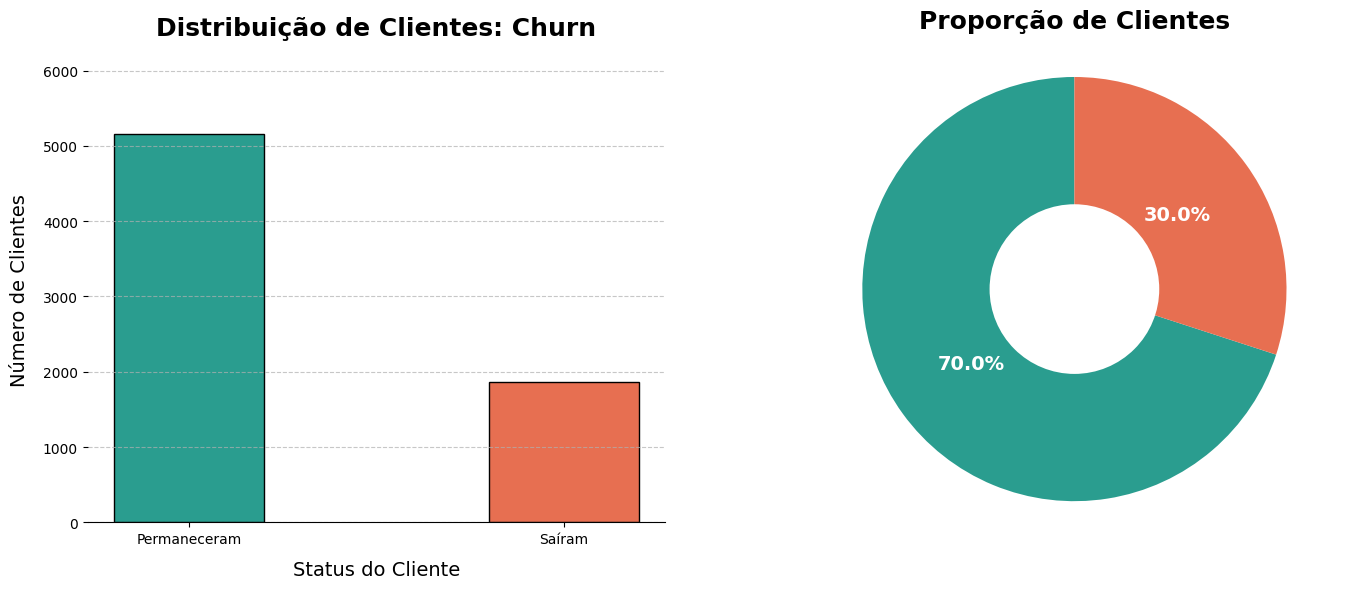

In [47]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Gráfico de barras com dados reais
cores = ['#2a9d8f', '#e76f51']
churn_labels = ['Permaneceram', 'Saíram']
valores = dados_clientes['Churn'].value_counts().sort_index().values

axs[0].bar(churn_labels, valores, color=cores, edgecolor='black', width=0.4)
axs[0].set_title("Distribuição de Clientes: Churn", fontsize=18, weight='bold', pad=15)
axs[0].set_xlabel("Status do Cliente", fontsize=14, labelpad=10)
axs[0].set_ylabel("Número de Clientes", fontsize=14, labelpad=10)
axs[0].set_ylim(0, max(valores)*1.2)

axs[0].spines['left'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

axs[0].yaxis.grid(True, linestyle='--', alpha=0.7)
axs[0].xaxis.grid(False)

# Gráfico donut (exemplo fixo)
valores_donut = [70, 30]

wedges, texts, autotexts = axs[1].pie(
    valores_donut,
    labels=churn_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    pctdistance=0.6,
    textprops={'fontsize': 14, 'weight': 'bold', 'color': 'white'}
)

centre_circle = plt.Circle((0, 0), 0.4, fc='white')
axs[1].add_artist(centre_circle)
axs[1].set_title('Proporção de Clientes', fontsize=18, weight='bold', pad=20)
axs[1].axis('equal')  # Para círculo perfeito

plt.tight_layout()
plt.show()


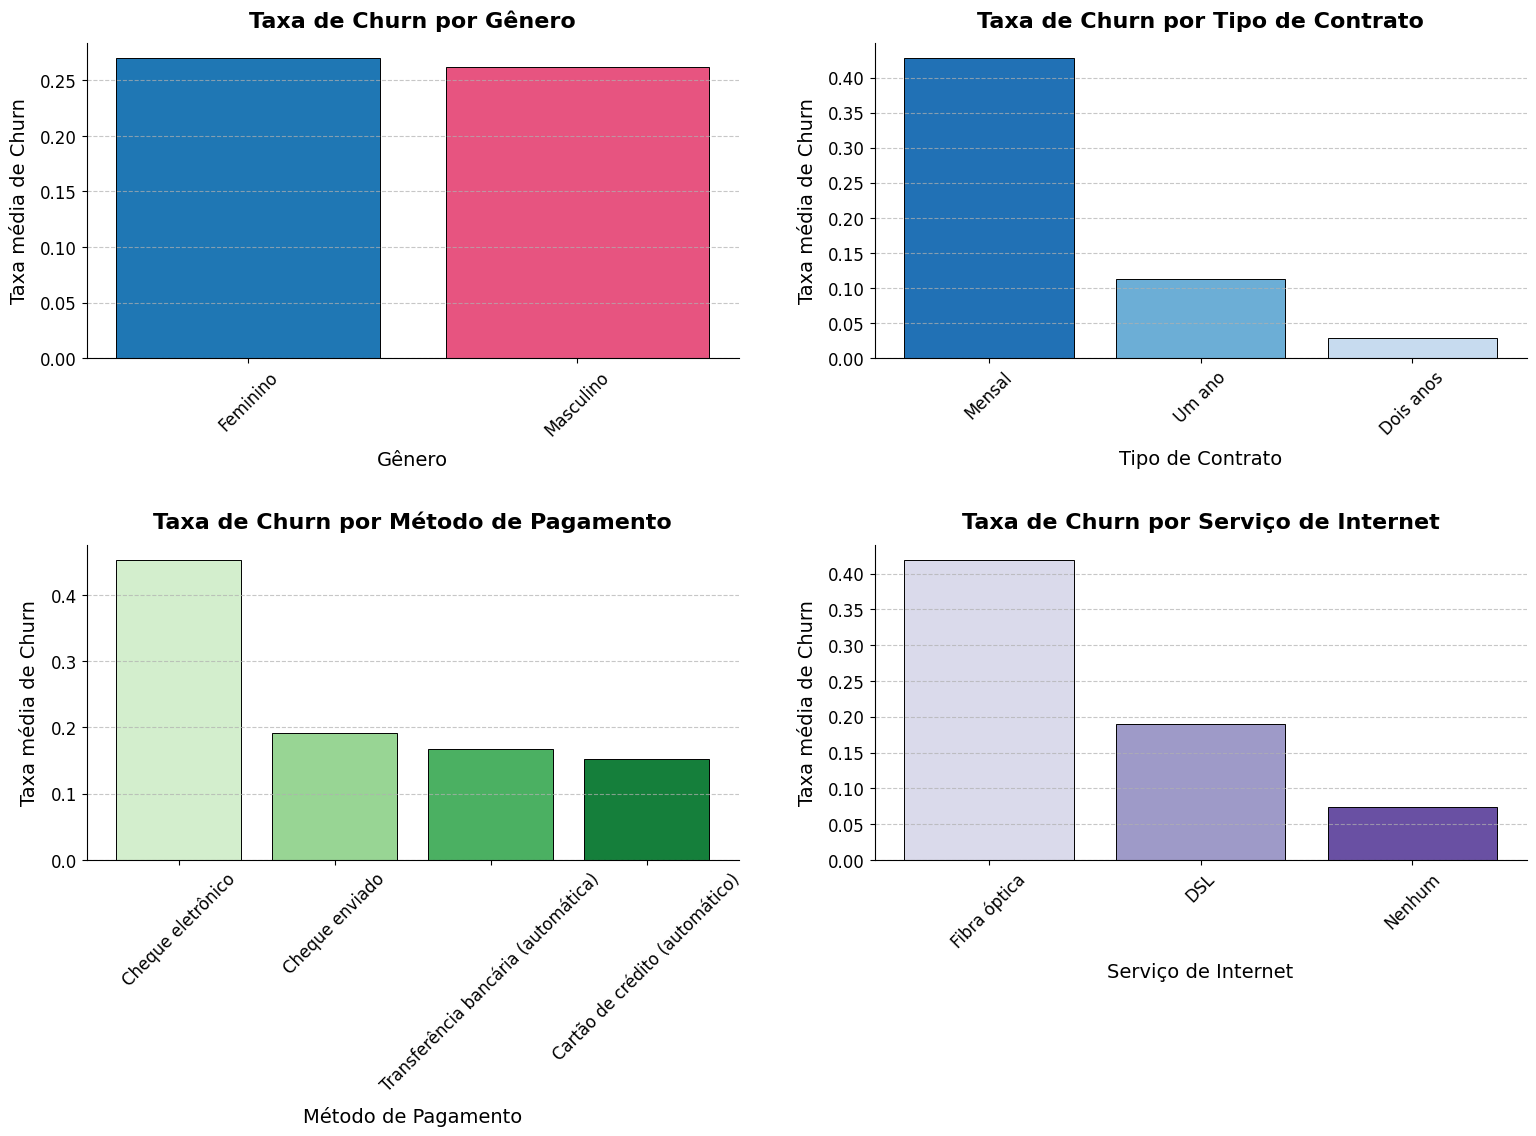

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionários de tradução para os valores de cada variável
traducao_valores = {
    'gender': {'Male': 'Masculino', 'Female': 'Feminino'},
    'Contract': {
        'Month-to-month': 'Mensal',
        'One year': 'Um ano',
        'Two year': 'Dois anos'
    },
    'PaymentMethod': {
        'Electronic check': 'Cheque eletrônico',
        'Mailed check': 'Cheque enviado',
        'Bank transfer (automatic)': 'Transferência bancária (automática)',
        'Credit card (automatic)': 'Cartão de crédito (automático)'
    },
    'InternetService': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra óptica',
        'No': 'Nenhum'
    }
}

categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

titulos = {
    'gender': 'Taxa de Churn por Gênero',
    'Contract': 'Taxa de Churn por Tipo de Contrato',
    'PaymentMethod': 'Taxa de Churn por Método de Pagamento',
    'InternetService': 'Taxa de Churn por Serviço de Internet'
}

eixo_x_labels = {
    'gender': 'Gênero',
    'Contract': 'Tipo de Contrato',
    'PaymentMethod': 'Método de Pagamento',
    'InternetService': 'Serviço de Internet'
}

# Cores específicas para cada gráfico
paletas_cores = {
    'gender': ['#1f77b4', '#e75480'],  # azul e rosa
    'Contract': sns.color_palette("Blues_r", n_colors=3),
    'PaymentMethod': sns.color_palette("Greens", n_colors=4),
    'InternetService': sns.color_palette("Purples", n_colors=3)
}

plt.figure(figsize=(16, 12))

for i, col in enumerate(categoricas, 1):
    plt.subplot(2, 2, i)

    dados_traduzidos = dados_clientes[col].map(traducao_valores[col])
    taxa_churn = dados_clientes.assign(**{col: dados_traduzidos}).groupby(col)['Churn'].mean().sort_values(ascending=False)

    colors = paletas_cores[col][:len(taxa_churn)]

    bars = plt.bar(taxa_churn.index, taxa_churn.values, color=colors, edgecolor='black', linewidth=0.7)

    plt.title(titulos[col], fontsize=16, weight='bold', pad=12)
    plt.ylabel('Taxa média de Churn', fontsize=14, labelpad=8)
    plt.xlabel(eixo_x_labels[col], fontsize=14, labelpad=8)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine(top=True, right=True)

plt.tight_layout(pad=3)
plt.show()


/tmp/ipython-input-8888570.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-8888570.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Permaneceu', 'Cancelou'], fontsize=12)
/tmp/ipython-input-8888570.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-8888570.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Permaneceu', 'Cancelou'], fontsize=12)


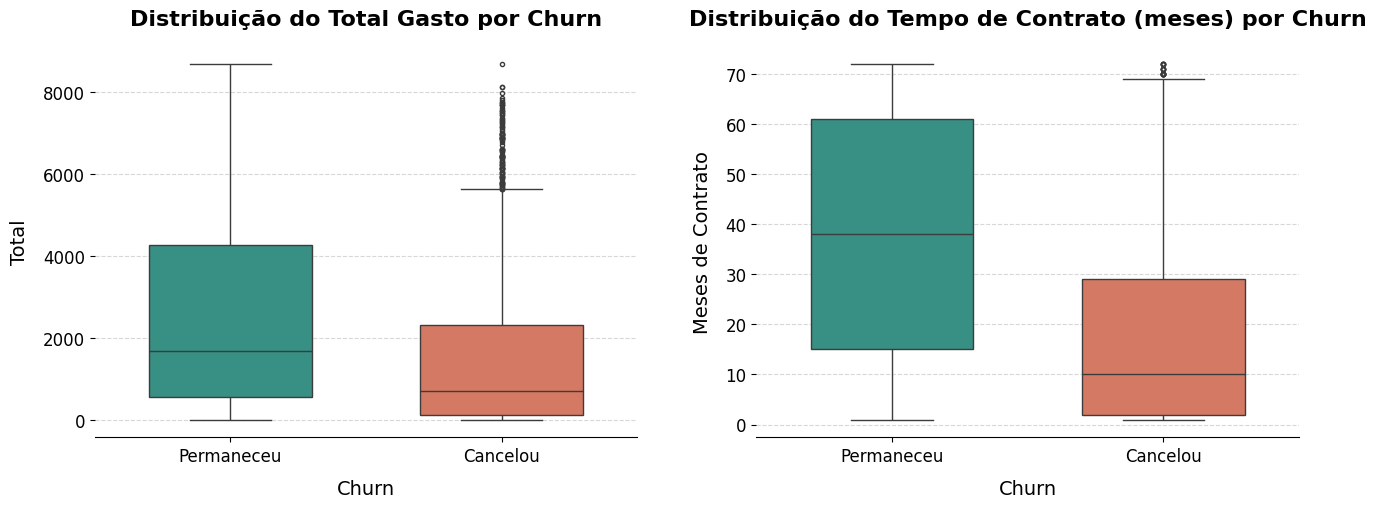

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_num = ['Total', 'tenure']

# Paleta suave para churn: azul para permaneceu (0), vermelho para cancelou (1)
cores = ['#2a9d8f', '#e76f51']

plt.figure(figsize=(14, 6))

for i, col in enumerate(variaveis_num, 1):
    ax = plt.subplot(1, 2, i)

    sns.boxplot(
        x='Churn',
        y=col,
        data=dados_clientes,
        palette=cores,
        ax=ax,
        width=0.6,
        fliersize=3
    )

    # Título e rótulos traduzidos com fonte maior e espaçamento
    titulo = f'Distribuição de {col} por Churn'
    if col.lower() == 'total':
        titulo = 'Distribuição do Total Gasto por Churn'
    elif col.lower() == 'tenure':
        titulo = 'Distribuição do Tempo de Contrato (meses) por Churn'

    ax.set_title(titulo, fontsize=16, weight='bold', pad=15)
    ax.set_xlabel('Churn', fontsize=14, labelpad=10)
    ax.set_ylabel(col if col != 'tenure' else 'Meses de Contrato', fontsize=14, labelpad=10)

    # Personalizar ticks do eixo X
    ax.set_xticklabels(['Permaneceu', 'Cancelou'], fontsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Remover borda direita e superior para limpeza visual
    sns.despine(ax=ax, top=True, right=True)

    # Remover linha vertical do eixo Y para design mais clean
    ax.spines['left'].set_visible(False)

    # Grid horizontal leve
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(pad=4)
plt.show()


In [50]:
print(dados_clientes.groupby('Churn')[variaveis_num].describe().T)


Churn              0       1
Total  count 5163.00 1869.00
       mean  2555.34 1531.80
       std   2329.46 1890.82
       min     18.80   18.85
       25%    577.83  134.50
       50%   1683.60  703.55
       75%   4264.12 2331.30
       max   8672.45 8684.80
tenure count 5163.00 1869.00
       mean    37.65   17.98
       std     24.08   19.53
       min      1.00    1.00
       25%     15.00    2.00
       50%     38.00   10.00
       75%     61.00   29.00
       max     72.00   72.00


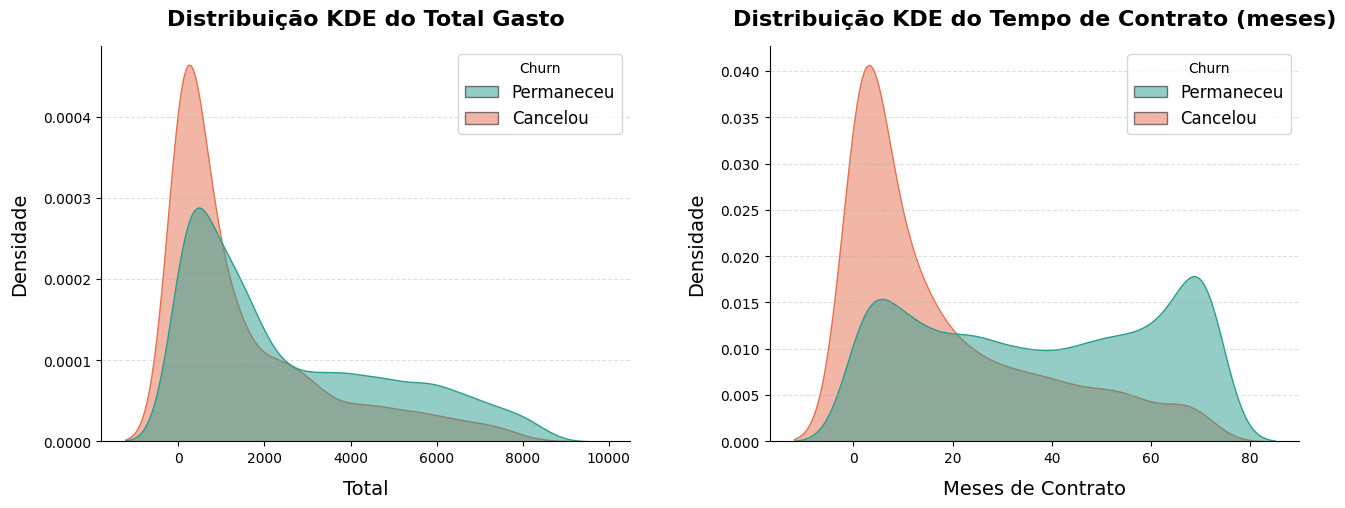

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_num = ['Total', 'tenure']
cores = ['#2a9d8f', '#e76f51']  # azul e vermelho

plt.figure(figsize=(14, 6))

for i, col in enumerate(variaveis_num, 1):
    ax = plt.subplot(1, 2, i)

    sns.kdeplot(
        data=dados_clientes,
        x=col,
        hue='Churn',
        fill=True,
        common_norm=False,
        alpha=0.5,
        palette=cores,
        ax=ax,
        legend=False  # desabilita legenda automática
    )

    titulo = f'Distribuição KDE de {col}'
    if col.lower() == 'total':
        titulo = 'Distribuição KDE do Total Gasto'
    elif col.lower() == 'tenure':
        titulo = 'Distribuição KDE do Tempo de Contrato (meses)'
    ax.set_title(titulo, fontsize=16, weight='bold', pad=15)
    ax.set_xlabel(col if col != 'tenure' else 'Meses de Contrato', fontsize=14, labelpad=10)
    ax.set_ylabel('Densidade', fontsize=14, labelpad=10)

    # Criar legenda manualmente
    from matplotlib.patches import Patch
    legend_labels = ['Permaneceu', 'Cancelou']
    legend_handles = [Patch(facecolor=cores[j], edgecolor='black', alpha=0.5) for j in range(len(cores))]
    ax.legend(handles=legend_handles, labels=legend_labels, fontsize=12, title='Churn')

    sns.despine(ax=ax, top=True, right=True)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(pad=4)
plt.show()


##Calcular correlação entre variáveis numéricas

In [52]:
# Selecionar variáveis numéricas para correlação
num_cols = ['Contas_Diarias', 'Total', 'Monthly', 'tenure', 'Churn']

# Matriz de correlação
corr = dados_clientes[num_cols].corr()

print("Matriz de Correlação:")
print(corr)


Matriz de Correlação:
                Contas_Diarias  Total  Monthly  tenure  Churn
Contas_Diarias            1.00   0.65     1.00    0.25   0.19
Total                     0.65   1.00     0.65    0.83  -0.20
Monthly                   1.00   0.65     1.00    0.25   0.19
tenure                    0.25   0.83     0.25    1.00  -0.35
Churn                     0.19  -0.20     0.19   -0.35   1.00


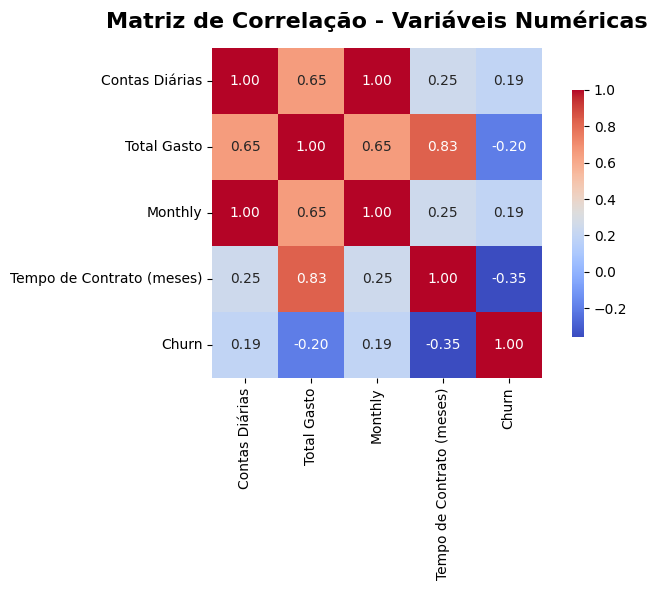

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de mapeamento das colunas para português
mapa_traducao = {
    'Total': 'Total Gasto',
    'tenure': 'Tempo de Contrato (meses)',
    'Contas_Diarias': 'Contas Diárias',
    # adicione mais se precisar
}

# Renomear o índice e colunas do DataFrame de correlação
corr_renomeada = corr.rename(index=mapa_traducao, columns=mapa_traducao)

plt.figure(figsize=(8,6))
sns.heatmap(corr_renomeada, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .75})
plt.title("Matriz de Correlação - Variáveis Numéricas", fontsize=16, weight='bold', pad=15)
plt.tight_layout()
plt.show()


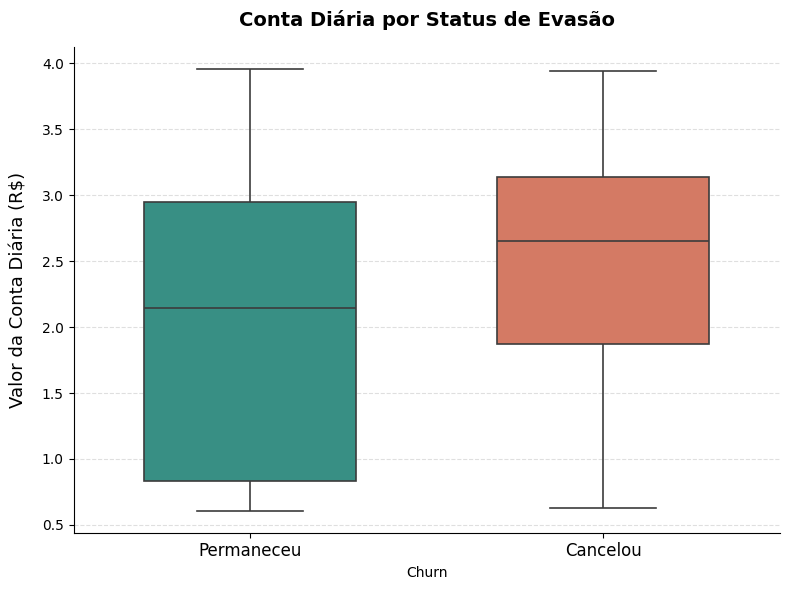

In [54]:
plt.figure(figsize=(8,6))

cores = ['#2a9d8f', '#e76f51']

ax = sns.boxplot(
    x='Churn',
    y='Contas_Diarias',
    data=dados_clientes,
    hue='Churn',             # para usar palette corretamente
    palette=cores,
    dodge=False,             # evita duplicar barras
    width=0.6,
    fliersize=4,
    linewidth=1.2,
    legend=False             # desativa legenda automática
)

ax.set_title('Conta Diária por Status de Evasão', fontsize=14, weight='bold', pad=15)
ax.set_ylabel('Valor da Conta Diária (R$)', fontsize=13, labelpad=10)

# Define ticks explicitamente antes de renomear os labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Permaneceu', 'Cancelou'], fontsize=12)

sns.despine(top=True, right=True)
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


#📄Relatorio Final

##1. Introdução

Este relatório apresenta uma análise exploratória sobre a evasão de clientes (churn) na empresa Telecom X, utilizando um conjunto de dados reais contendo informações demográficas, tipos de serviços contratados e comportamento de pagamento dos clientes.

O churn é um indicador essencial para empresas de telecomunicações, pois a perda de clientes impacta diretamente a receita e os custos operacionais. Entender quais características e padrões estão associados à evasão permite à empresa planejar ações estratégicas para aumentar a retenção e melhorar a experiência do cliente.

Neste trabalho, realizamos a extração, limpeza, transformação e análise dos dados para identificar os principais fatores relacionados ao churn, fornecendo subsídios para a equipe de Data Science desenvolver modelos preditivos e estratégias de retenção eficazes.

##2. Desenvolvimento

###2.1 Extração dos Dados

Os dados utilizados nesta análise foram obtidos por meio de uma API da Telecom X, disponibilizados no formato JSON. O conjunto contém informações detalhadas sobre os clientes, incluindo seus perfis demográficos, os serviços contratados e o histórico financeiro.

A extração dos dados foi realizada utilizando bibliotecas Python, como requests para fazer a requisição à API e pandas para converter os dados JSON em um DataFrame, facilitando a manipulação e análise subsequente.

###2.2 Transformação dos Dados

Na etapa de transformação e limpeza dos dados, realizamos inicialmente a correção de inconsistências para garantir a qualidade das informações. A coluna referente ao total de cobranças foi convertida para valores numéricos, tratando eventuais entradas inválidas como ausentes. Também substituímos valores vazios na coluna de evasão (Churn) por valores nulos e, em seguida, removemos todas as linhas que continham dados faltantes, assegurando um conjunto de dados íntegro e confiável para análise. Após essa limpeza, verificou-se que não restaram valores ausentes nem registros duplicados, e a coluna de evasão passou a conter apenas as categorias válidas “No” e “Yes”.

Para facilitar a análise dos gastos médios diários dos clientes, criamos uma nova variável chamada "Contas Diárias", que corresponde à divisão do valor mensal cobrado pelo cliente pelo número médio de dias do mês, estimado em 30 dias. Essa variável oferece uma visão mais detalhada do comportamento financeiro dos clientes em relação ao serviço contratado.

Em seguida, procedemos à padronização dos nomes das colunas, eliminando prefixos complexos para simplificar e tornar os nomes mais intuitivos. Por exemplo, colunas como "account.Charges.Total" foram renomeadas para "Total". Além disso, algumas variáveis originalmente categóricas e binárias, com respostas em texto ("Yes"/"No"), foram convertidas para valores numéricos binários (1 para “Sim” e 0 para “Não”), facilitando a manipulação e análise estatística. Entre essas variáveis estão as relacionadas à evasão, ao vínculo conjugal, dependentes, serviço telefônico e faturamento sem papel.

Como resultado dessas transformações, obtivemos um conjunto de dados limpo, padronizado e organizado, com 7032 registros e 22 variáveis, pronto para as etapas subsequentes de análise e modelagem, oferecendo maior robustez e clareza para as conclusões a serem extraídas.

##2.3 Análise Exploratória

Nesta etapa inicial da análise, foi realizado um levantamento descritivo das variáveis presentes no conjunto de dados, com o objetivo de compreender melhor as características gerais da base.

As variáveis numéricas apresentam valores diversos, indicando perfis variados entre os clientes. Por exemplo, a média do tempo de permanência (tenure) é de aproximadamente 32 meses, com valores mínimos de 1 e máximos de 72 meses. A média dos valores mensais pagos (Monthly Charges) é de R$ 64,80, variando entre 18,25 reais e 118,75 reais. Também foi criada uma variável derivada denominada “Contas Diárias”, que representa a média de gastos diários do cliente, com uma média de aproximadamente 2,16 reais.

As variáveis binárias, como “Churn”, “Partner” e “Dependents”, indicam que cerca de 27% dos clientes cancelaram o serviço, enquanto aproximadamente 48% possuem parceiro e 30% possuem dependentes.

Quanto às variáveis categóricas, observa-se que a base contém dados como gênero dos clientes, tipos de serviços contratados, modalidades de contrato e métodos de pagamento. A maioria dos clientes é do gênero masculino, a principal modalidade de contrato é o plano mensal (“Month-to-month”) e a forma de pagamento mais comum é o cheque eletrônico.

Visualmente, a distribuição da evasão (Churn) está apresentada em dois gráficos: um gráfico de barras evidencia a quantidade absoluta de clientes que permaneceram (aproximadamente 73%) e os que saíram (27%). Complementarmente, o gráfico do tipo “donut” ilustra a proporção percentual entre esses grupos, reforçando que a maioria dos clientes manteve o serviço ativo.

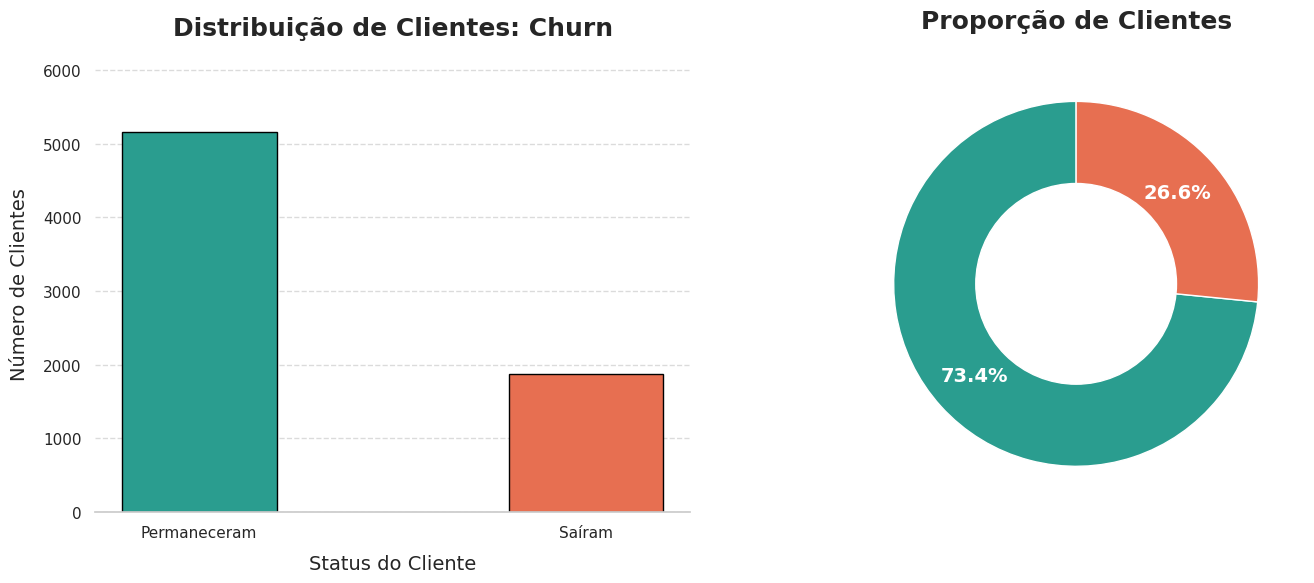

A análise das taxas médias de churn por variáveis categóricas revela padrões relevantes. Em relação ao gênero, observa-se que a taxa de evasão é praticamente igual entre clientes masculinos e femininos, em torno de 26%, indicando que o gênero não exerce influência significativa na decisão de cancelamento. Já no tipo de contrato, nota-se que clientes com plano mensal apresentam a maior taxa de evasão, aproximadamente 42%, enquanto aqueles com contrato de um ano registram cerca de 11% e os de dois anos apenas 3%, evidenciando que contratos de maior duração estão fortemente associados à retenção.

No que se refere ao método de pagamento, o cheque eletrônico concentra a maior taxa de churn (cerca de 45%), ao passo que formas automáticas, como cartão de crédito e transferência bancária, apresentam índices mais baixos, entre 15% e 17%, sugerindo que a automação do pagamento pode contribuir para manter o cliente ativo.

Por fim, quanto ao serviço de internet, a fibra óptica se destaca com a maior taxa de evasão, cerca de 42%, seguida pelo DSL (19%), enquanto clientes sem serviço de internet têm os menores índices (7%), o que pode indicar problemas específicos na experiência com a fibra óptica. Esses resultados reforçam a relevância de fatores contratuais, operacionais e tecnológicos na compreensão e previsão da evasão de clientes.

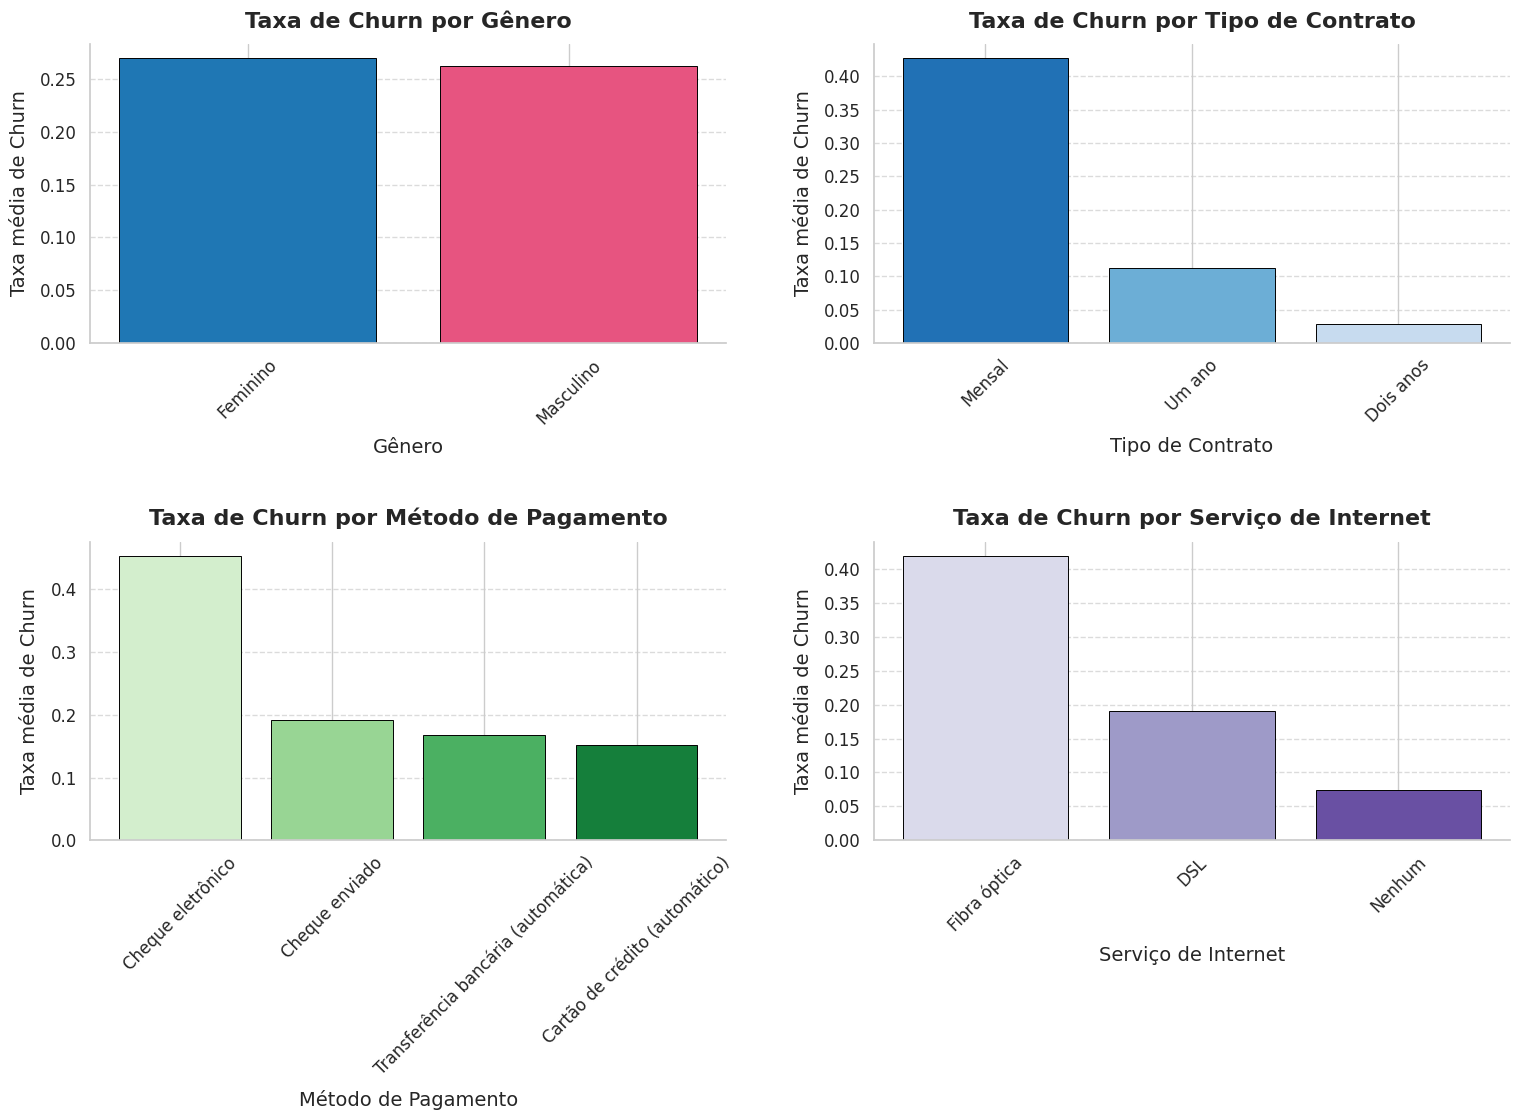

A análise da distribuição do total gasto e do tempo de contrato (tenure) por situação de churn evidencia diferenças marcantes entre clientes que permaneceram e os que cancelaram o serviço.

No primeiro caso, observa-se que clientes ativos apresentam valores medianos de gasto total significativamente mais altos em relação aos clientes que cancelaram, o que indica que a permanência está associada a um maior histórico de consumo.

Já no tempo de contrato, verifica-se que clientes que permaneceram têm uma mediana próxima a 38 meses, enquanto aqueles que cancelaram apresentam mediana de apenas 10 meses, evidenciando que a evasão ocorre com maior frequência nos primeiros meses de vínculo.

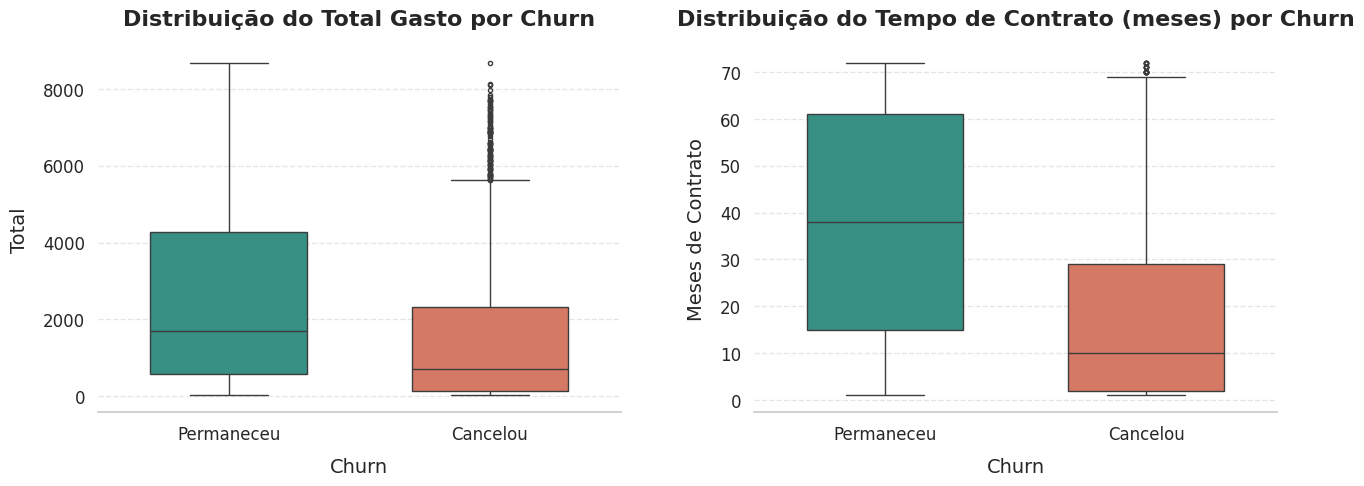

A análise das distribuições de densidade (KDE) para o total gasto e para o tempo de contrato reforça o padrão observado anteriormente nos boxplots. No caso do total gasto, nota-se que clientes que cancelaram apresentam forte concentração nos valores mais baixos, enquanto clientes que permaneceram apresentam uma distribuição mais espalhada e com cauda longa, indicando maiores gastos ao longo do tempo.

Em relação ao tempo de contrato, observa-se que clientes que cancelaram se concentram nos primeiros meses de vínculo, enquanto os que permaneceram apresentam picos tanto nos primeiros meses quanto na faixa próxima a 70–80 meses, sugerindo dois perfis distintos de permanência. Esses resultados indicam que o churn está fortemente associado a contratos mais curtos e menor histórico de gastos, reforçando a necessidade de estratégias de retenção direcionadas aos clientes em fase inicial de relacionamento.

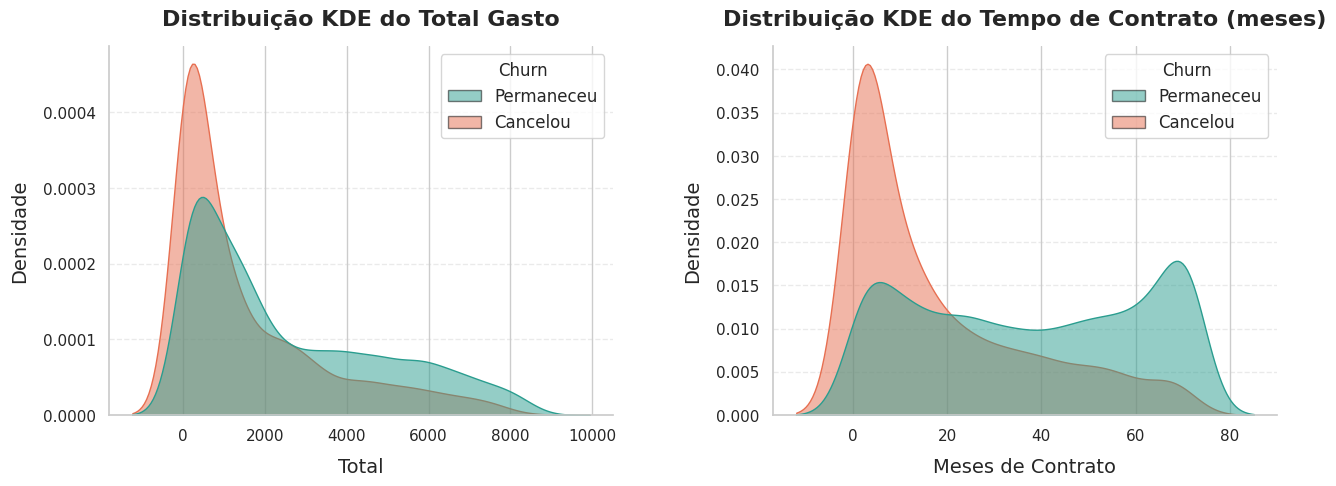

A matriz de correlação entre as variáveis numéricas revela alguns padrões importantes. Observa-se uma correlação positiva muito forte entre Contas Diárias e Mensalidade (1.00), o que indica que essas variáveis carregam essencialmente a mesma informação. Há também forte correlação positiva entre Tempo de Contrato e Total Gasto (0.83), o que é esperado, pois clientes com mais tempo de vínculo tendem a acumular maior gasto total.

A relação entre Churn e as variáveis mostra padrões opostos: existe correlação negativa moderada com o Tempo de Contrato (-0.35) e com o Total Gasto (-0.20), sugerindo que clientes que permanecem por mais tempo e gastam mais têm menor probabilidade de cancelar.

Por outro lado, Contas Diárias e Mensalidade apresentam correlação positiva fraca com o Churn (0.19), o que pode indicar que valores mais altos nessas métricas estão levemente associados à maior taxa de cancelamento. Esses resultados reforçam a importância do tempo de relacionamento e do gasto acumulado como fatores protetores contra a evasão.



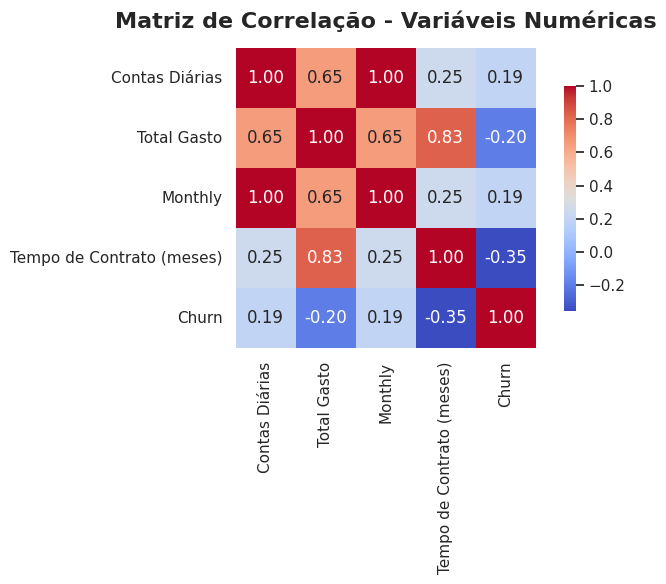

O boxplot de Conta Diária por Status de Evasão mostra que clientes que cancelaram tendem a apresentar valores medianos de conta diária mais altos em comparação aos que permaneceram. A mediana para o grupo que permaneceu está próxima de 2,20 reais, enquanto no grupo que cancelou aproxima-se de 2,70 reais.

Além disso, a dispersão é ligeiramente maior entre os clientes que permaneceram, com presença de valores mais baixos e maior amplitude total, enquanto os que cancelaram apresentam distribuição mais concentrada, mas com valores mínimos e máximos semelhantes. Esse padrão sugere que contas diárias mais altas podem estar associadas a uma probabilidade ligeiramente maior de cancelamento, possivelmente por refletirem custos percebidos como elevados pelos clientes.

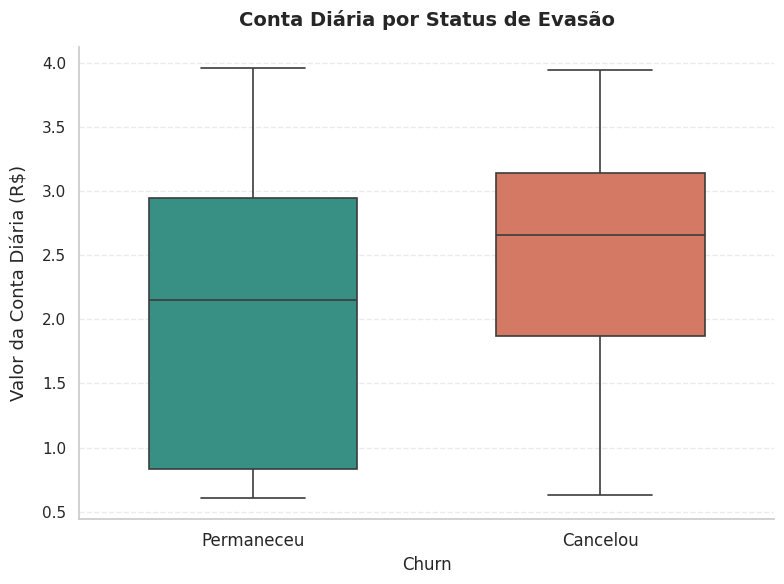

##3. Considerações Finais

A análise exploratória realizada evidenciou que a evasão de clientes (churn) na empresa apresenta relação significativa com variáveis contratuais, de pagamento e de perfil de consumo. Observou-se que clientes com contratos de maior duração, especialmente de dois anos, apresentam taxas de cancelamento substancialmente menores em comparação aos que optam por contratos mensais. Esse comportamento sugere que compromissos contratuais mais longos podem atuar como fator de fidelização.

O tempo de permanência (tenure) mostrou-se uma variável de destaque, com forte correlação negativa em relação ao churn, evidenciando que clientes mais antigos tendem a permanecer ativos. Além disso, métodos de pagamento automáticos, como débito em conta e cartão de crédito, estiveram associados a menor propensão à evasão, possivelmente em função da praticidade e da redução de barreiras no processo de cobrança.

Por outro lado, valores mais elevados de contas diárias e mensalidades apresentaram associação positiva, ainda que moderada, com a evasão. Esse resultado sugere que a sensibilidade ao preço pode ser um elemento a ser considerado em estratégias de retenção, especialmente em segmentos mais vulneráveis. O serviço de internet por fibra óptica apresentou taxa de churn mais elevada, apontando para a necessidade de investigação sobre a percepção de qualidade e competitividade dessa oferta.

Em síntese, os resultados reforçam a importância de adotar ações estratégicas voltadas à fidelização, especialmente nos primeiros meses de contrato, ao incentivo para migração a planos de maior duração e à ampliação do uso de métodos de pagamento automáticos, além de um acompanhamento contínuo da satisfação com os serviços prestados.